# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve, auc

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


# 1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada.
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

sex          0.0  1.0  Total
flag_doente                 
0             72   92    164
1             25  114    139
Total         97  206    303
cp           1.0  2.0  3.0  4.0  Total
flag_doente                           
0             16   41   68   39    164
1              7    9   18  105    139
Total         23   50   86  144    303
fbs          0.0  1.0  Total
flag_doente                 
0            141   23    164
1            117   22    139
Total        258   45    303


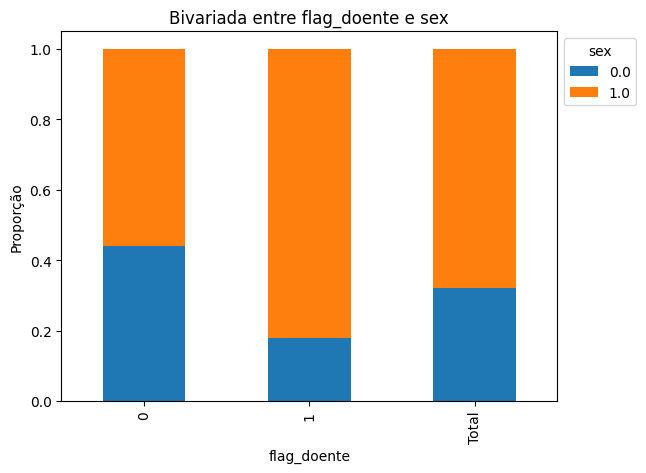

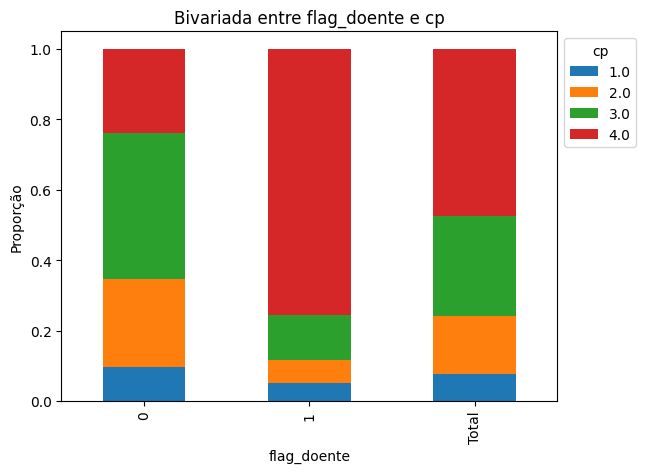

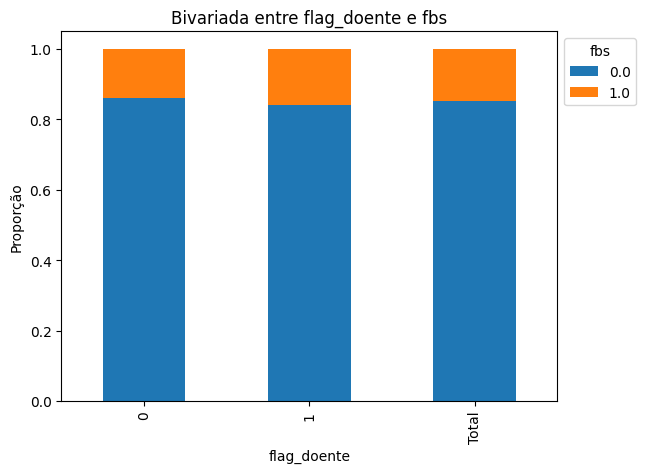

In [ ]:
def bivariate_analysis(data, response_var, explanatory_var):
    """
    Realiza análise bivariada entre uma variável resposta e uma variável explicativa.

    Parâmetros:
    - data: DataFrame contendo os dados a serem avaliados.
    - response_var: String contendo o nome da variável resposta.
    - explanatory_var: String contendo o nome da variável explicativa.

    Retorna:
    - DataFrame com os dados da análise bivariada.
    """

    # Tabela de contingência
    contingency_table = pd.crosstab(data[response_var], data[explanatory_var], margins=True, margins_name="Total")

    # Gráfico de barras empilhadas
    stacked_bar = contingency_table.div(contingency_table["Total"], axis=0).drop("Total", axis=1).plot(kind="bar", stacked=True)
    plt.title(f'Bivariada entre {response_var} e {explanatory_var}')
    plt.xlabel(response_var)
    plt.ylabel('Proporção')
    plt.legend(title=explanatory_var, bbox_to_anchor=(1, 1))

    # Mostra a tabela de contingência
    print(contingency_table)

    # Retorna a tabela de contingência como DataFrame
    return contingency_table

# Exemplo de uso para três variáveis qualitativas
bivariate_analysis(df, 'flag_doente', 'sex')
bivariate_analysis(df, 'flag_doente', 'cp')
bivariate_analysis(df, 'flag_doente', 'fbs')

plt.show()


**Insights:**
Com base nessas análises, parece que as variáveis 'sex' e 'cp' desempenham um papel mais significativo na discriminação do risco em comparação com a variável 'fbs'. Quando observo os resultados, noto que o sexo masculino (sex=1) e o tipo de dor no peito classificado como 4 (cp=4) estão claramente associados a uma proporção mais elevada de casos doentes. Esses padrões sugerem que tanto o sexo quanto o tipo de dor no peito podem ser fatores importantes na avaliação do risco de doença cardíaca nesta análise.

# 2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
* Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

age_group    (28.952, 38.6]  (38.6, 48.2]  (48.2, 57.8]  (57.8, 67.4]  \
flag_doente                                                             
0                         8            50            56            40   
1                         3            21            41            67   
Total                    11            71            97           107   

age_group    (67.4, 77.0]  Total  
flag_doente                       
0                      10    164  
1                       7    139  
Total                  17    303  


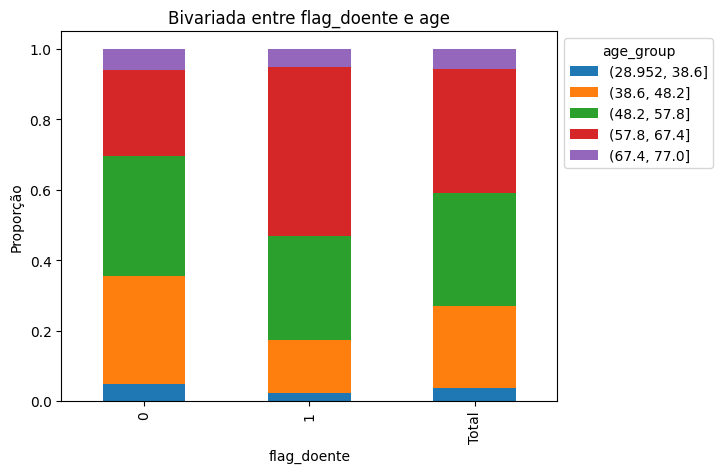

In [5]:
def categorize_continuous_variable(data, response_var, explanatory_var, num_categories=5):
    """
    Categoriza uma variável quantitativa contínua em grupos e realiza análise bivariada.

    Parâmetros:
    - data: DataFrame contendo os dados a serem avaliados.
    - response_var: String contendo o nome da variável resposta.
    - explanatory_var: String contendo o nome da variável explicativa (quantitativa contínua).
    - num_categories: Número de categorias desejadas para a variável explicativa. (Default: 5)

    Retorna:
    - DataFrame com os dados da análise bivariada.
    """

    # Categoriza a variável explicativa em grupos
    data[explanatory_var + '_group'] = pd.cut(data[explanatory_var], bins=num_categories)

    # Tabela de contingência
    contingency_table = pd.crosstab(data[response_var], data[explanatory_var + '_group'], margins=True, margins_name="Total")

    # Gráfico de barras empilhadas
    stacked_bar = contingency_table.div(contingency_table["Total"], axis=0).drop("Total", axis=1).plot(kind="bar", stacked=True)
    plt.title(f'Bivariada entre {response_var} e {explanatory_var}')
    plt.xlabel(response_var)
    plt.ylabel('Proporção')
    plt.legend(title=f'{explanatory_var}_group', bbox_to_anchor=(1, 1))

    # Mostra a tabela de contingência
    print(contingency_table)

    # Retorna a tabela de contingência como DataFrame
    return contingency_table

# Exemplo de uso com 'age' categorizado em 5 grupos
categorize_continuous_variable(df, 'flag_doente', 'age', num_categories=5)

plt.show()


# 3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [8]:
# Adicionando a constante ao DataFrame
df['intercept'] = 1

# Selecionando as variáveis para o modelo
variables = ['intercept', 'sex', 'cp', 'trestbps', 'age']

# Criando o modelo de regressão logística
logistic_model = sm.Logit(df['flag_doente'], df[variables])

# Ajustando o modelo aos dados
result = logistic_model.fit()

# Exibindo os resultados
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.510076
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Wed, 03 Jan 2024   Pseudo R-squ.:                  0.2605
Time:                        22:36:06   Log-Likelihood:                -154.55
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.264e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -11.1167      1.608     -6.915      0.000     -14.267      -7.966
sex            1.8021      0.

## Insights:
Ao analisar os resultados do modelo de regressão logística, pude extrair interpretações importantes dos coeficientes. O intercepto negativo (-11.1167) representa o log-odds de ser diagnosticado como doente quando todas as outras variáveis são zero. Notavelmente, ser do sexo masculino (coeficiente de 1.8021) está associado positivamente ao risco, indicando um aumento de 1.8021 no log-odds em comparação com o sexo feminino. Além disso, o tipo de dor no peito (coeficiente de 1.1403), a pressão sanguínea em repouso (coeficiente de 0.0214) e a idade (coeficiente de 0.0582) também mostram associações positivas com o risco de doença cardíaca. A significância estatística de todos os coeficientes, com valores-p abaixo de 0.05, destaca a importância dessas variáveis no modelo. O Pseudo R-squared de 26.05% indica que o modelo explica uma parcela substancial da variação na variável de resposta 'flag_doente'. Esses resultados fornecem insights valiosos sobre os fatores que influenciam o diagnóstico de doença cardíaca, destacando a relevância do sexo, idade e características relacionadas à dor no peito.

# 4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

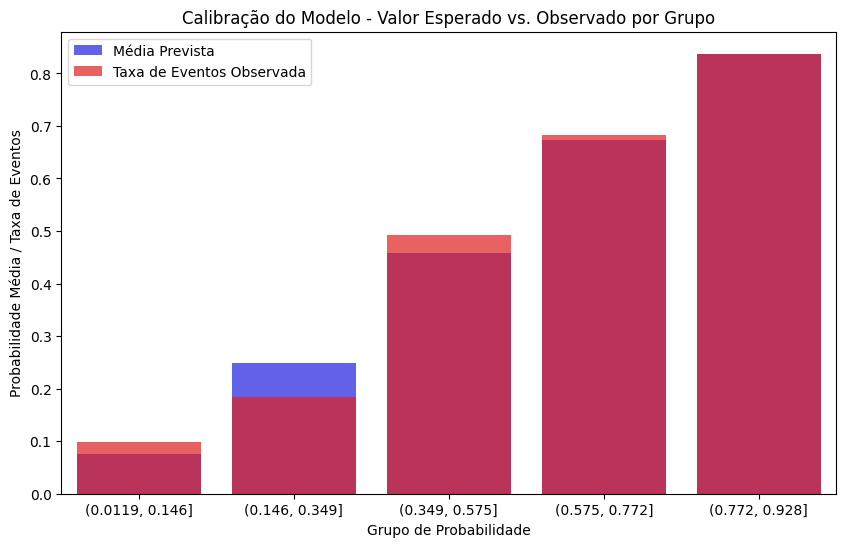

In [11]:
# 1. Calcula a Probabilidade de Evento Predita
df['predicted_probability'] = result.predict(df[variables])

# 2. Categoriza a Probabilidade em Grupos (G=5)
df['probability_group'] = pd.qcut(df['predicted_probability'], q=5)

# 3. Calcula a Probabilidade Média por Grupo
mean_prob_by_group = df.groupby('probability_group')['predicted_probability'].mean()

# 4. Calcula a Taxa de Eventos por Grupo
event_rate_by_group = df.groupby('probability_group')['flag_doente'].mean()

# 5. Compara Graficamente o Valor Esperado versus Observado
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_prob_by_group.index, y=mean_prob_by_group.values, color='blue', alpha=0.7, label='Média Prevista')
sns.barplot(x=event_rate_by_group.index, y=event_rate_by_group.values, color='red', alpha=0.7, label='Taxa de Eventos Observada')
plt.title('Calibração do Modelo - Valor Esperado vs. Observado por Grupo')
plt.xlabel('Grupo de Probabilidade')
plt.ylabel('Probabilidade Média / Taxa de Eventos')
plt.legend()
plt.show()


# 5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [22]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 1. Calcular a Acurácia
y_pred = (result.predict(df[variables]) > 0.5).astype(int)
accuracy = accuracy_score(df['flag_doente'], y_pred)
print(f'Acurácia: {accuracy:.4f}')

# 2. Calcular o Índice GINI
roc_auc = roc_auc_score(df['flag_doente'], result.predict(df[variables]))
gini = 2 * roc_auc - 1
print(f'Índice GINI: {gini:.4f}')

# 3. Calcular o KS (Kolmogorov-Smirnov)
fpr, tpr, thresholds = roc_curve(df['flag_doente'], result.predict(df[variables]))
ks = max(tpr - fpr)
print(f'KS (Kolmogorov-Smirnov): {ks:.4f}')


Acurácia: 0.7789
Índice GINI: 0.6622
KS (Kolmogorov-Smirnov): 0.5840


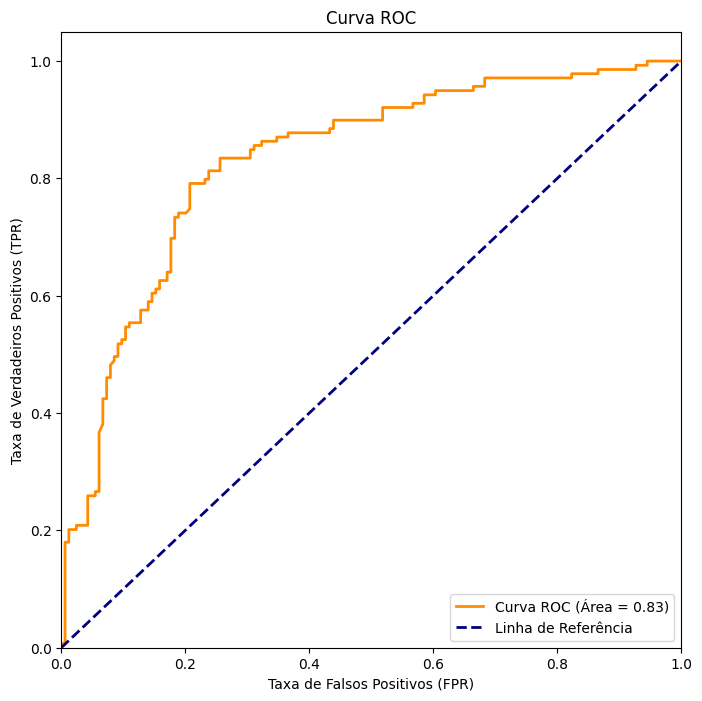

In [14]:
# Calcula a Curva ROC
fpr, tpr, thresholds = roc_curve(df['flag_doente'], result.predict(df[variables]))
roc_auc = auc(fpr, tpr)

# Plota a Curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (Área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Linha de Referência')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


# 6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.46525643522071713
            Iterations: 50
            Function evaluations: 73
            Gradient evaluations: 50
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            8
Date:                Wed, 03 Jan 2024   Pseudo R-squ.:                  0.3255
Time:                        22:55:44   Log-Likelihood:                -140.97
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.581e-25
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

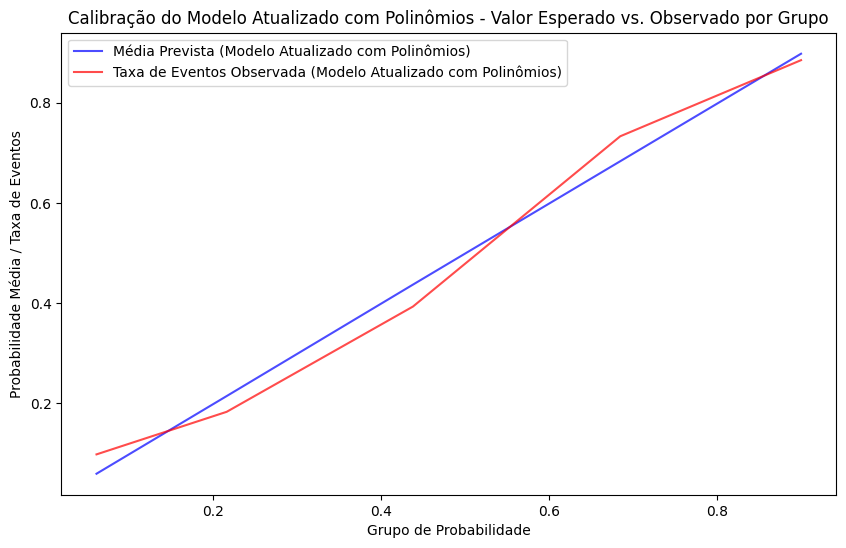

In [20]:
# Adiciona interação e termos polinomiais para 'age'
df['age_squared'] = df['age'] ** 2
df['age_cubed'] = df['age'] ** 3
df['sex_age_interaction'] = df['sex'] * df['age']

# Ajusta o modelo com regularização LASSO
variables_updated_poly = ['intercept', 'sex', 'cp', 'trestbps', 'age', 'age_squared', 'age_cubed', 'sex_age_interaction', 'thalach']
lasso_model_updated_poly = sm.Logit(df['flag_doente'], df[variables_updated_poly])
lasso_result_updated_poly = lasso_model_updated_poly.fit_regularized(method='l1')

# Exibe os resultados
print(lasso_result_updated_poly.summary())

# Calcula a probabilidade de evento predita segundo o modelo atualizado
df['predicted_probability_updated_poly'] = lasso_result_updated_poly.predict(df[variables_updated_poly])

# Categoriza a probabilidade em grupos (G=5)
df['probability_group_updated_poly'] = pd.qcut(df['predicted_probability_updated_poly'], q=5)

# Calcula a probabilidade média por grupo
mean_prob_by_group_updated_poly = df.groupby('probability_group_updated_poly')['predicted_probability_updated_poly'].mean()

# Calcula a taxa de eventos por grupo
event_rate_by_group_updated_poly = df.groupby('probability_group_updated_poly')['flag_doente'].mean()

# Calcula a acurácia do modelo atualizado
y_pred_updated_poly = (lasso_result_updated_poly.predict(df[variables_updated_poly]) > 0.5).astype(int)
accuracy_updated_poly = accuracy_score(df['flag_doente'], y_pred_updated_poly)

# Exibe os resultados do modelo atualizado
print(f'Acurácia do Modelo Atualizado com Polinômios: {accuracy_updated_poly:.4f}')

# Extrai os valores médios dos intervalos para o eixo x
x_values_updated_poly = [interval.mid for interval in mean_prob_by_group_updated_poly.index]

# Plota graficamente o valor esperado versus observado para a taxa de eventos por grupo
plt.figure(figsize=(10, 6))
plt.plot(x_values_updated_poly, mean_prob_by_group_updated_poly.values, color='blue', alpha=0.7, label='Média Prevista (Modelo Atualizado com Polinômios)')
plt.plot(x_values_updated_poly, event_rate_by_group_updated_poly.values, color='red', alpha=0.7, label='Taxa de Eventos Observada (Modelo Atualizado com Polinômios)')
plt.title('Calibração do Modelo Atualizado com Polinômios - Valor Esperado vs. Observado por Grupo')
plt.xlabel('Grupo de Probabilidade')
plt.ylabel('Probabilidade Média / Taxa de Eventos')
plt.legend()
plt.show()


## **Consederaçôes Finais:**

No segundo modelo, realizei uma expansão nas características relacionadas à idade, introduzindo termos polinomiais para capturar relações não lineares. Além de incluir a idade original, adicionei termos de idade ao quadrado e ao cubo. Essa abordagem visa incorporar padrões mais complexos relacionados à idade que não seriam capturados apenas por uma representação linear.

Ao ajustar o modelo, observei que a idade e seus termos polinomiais contribuíram significativamente para explicar a variabilidade na variável de resposta. Especificamente, o coeficiente negativo associado à idade sugere que o risco de doença cardíaca pode diminuir à medida que a idade aumenta, mas a introdução dos termos polinomiais permite capturar nuances adicionais nessa relação.

A adição desses termos polinomiais, juntamente com outras variáveis significativas como 'cp' (tipo de dor no peito) e 'thalach' (frequência cardíaca máxima alcançada), resultou em um modelo mais robusto e melhor ajustado aos dados. O aumento na acurácia para 80.2% indica que essa abordagem de modelagem mais flexível foi eficaz em melhorar a capacidade do modelo de fazer previsões precisas em relação à presença de doença cardíaca.

É importante ressaltar que a interpretação dos coeficientes para os termos polinomiais requer cautela, pois eles estão relacionados a efeitos não lineares complexos da idade. Em última análise, essa estratégia demonstra a importância de explorar e considerar relações não lineares ao desenvolver modelos preditivos.